# 1. Objective

To model zero-inflated count data, i.e., where the response has more zeros than can be expected from a standard Poisson or negative binomial models.

# 2. Why so many zeros?

First question to explore is to understand why there are so many zeros? 

There can be:
 - *structural zeros*, i.e., there is a valid theoretical/practical reason why response is 0
 - *false zeros*, i.e., poor sampling practises or observer errors led to zero observations
 
In an ideal world, false zeros should not exist and structural zeros should be modeled.

We can either *adjust* for excess zeros by using a two-part model or use a mixture of two distributions to handle *zero inflation*.

In a two-part model, we fit the first model to predict zero/non-zero using covariates and then the second model is conditioned on the non-zeros. In a mixure model, the zero/non-zero prediction is still done, but we do not exclude the probability of zero for the second model.

For a mixture model, there are two components that might result in zero response, allowing us to split the sources of 0 into these two sources. Either the 0 observation is being driven by a specific process disjoint with the non-zero responses or the process that is driving zeros yielded a non-zero response but the data generating process still produced a 0.

For a two-part model (or hurdle model), the zero producing process is distinct from the non-zero producing process and hence each has its own model. 

# 3. Fitting a zero-inflation model

In [6]:
data_df = read.delim("data/ParasiteCod.txt") %>% drop_na()

In [7]:
glimpse(data_df)

Observations: 1,191
Variables: 11
$ Sample     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ Intensity  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Prevalence <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Year       <int> 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999…
$ Depth      <int> 220, 220, 220, 220, 220, 220, 220, 194, 194, 194, 194, 194…
$ Weight     <int> 148, 144, 146, 138, 40, 68, 52, 3848, 2576, 1972, 2272, 10…
$ Length     <int> 26, 26, 27, 26, 17, 20, 19, 77, 67, 60, 62, 49, 52, 45, 61…
$ Sex        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Stage      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Age        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Area       <int> 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3…


In [10]:
poiss_zinfl_model1 = glmmTMB(Intensity ~ factor(Area) * factor(Year) + Length,
                             ziformula = ~ factor(Area) * factor(Year) + Length,
                             family = "poisson",
                             data = data_df)

It seems you are diagnosing a glmmTBM model. There are still a few minor limitations associatd with this package. The most important is that glmmTMB doesn't implement an option to create unconditional predictions from the model, which means that predicted values (in res ~ pred) plots include the random effects. With strong random effects, this can sometimes create diagonal patterns from bottom left to top right in the res ~ pred plot. All other tests and plots should work as desired. Please see https://github.com/florianhartig/DHARMa/issues/16 for further details.


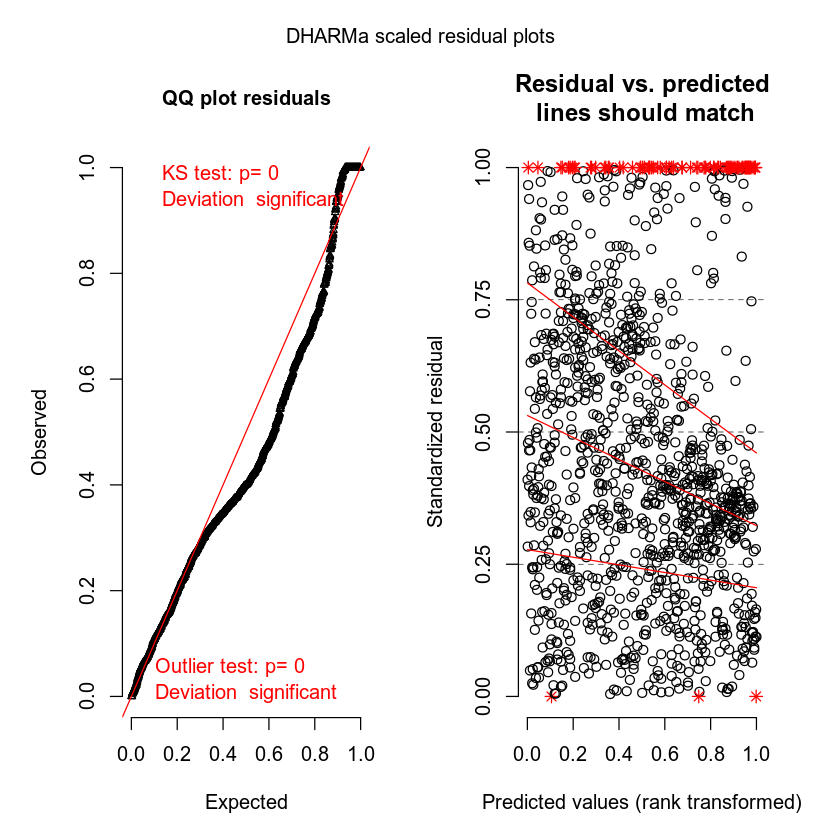

In [13]:
plot(simulateResiduals(poiss_zinfl_model1))

In [14]:
nb_zinfl_model1 = glmmTMB(Intensity ~ factor(Area) * factor(Year) + Length,
                          ziformula = ~ factor(Area) * factor(Year) + Length,
                          family = "nbinom2",
                          data = data_df)

It seems you are diagnosing a glmmTBM model. There are still a few minor limitations associatd with this package. The most important is that glmmTMB doesn't implement an option to create unconditional predictions from the model, which means that predicted values (in res ~ pred) plots include the random effects. With strong random effects, this can sometimes create diagonal patterns from bottom left to top right in the res ~ pred plot. All other tests and plots should work as desired. Please see https://github.com/florianhartig/DHARMa/issues/16 for further details.


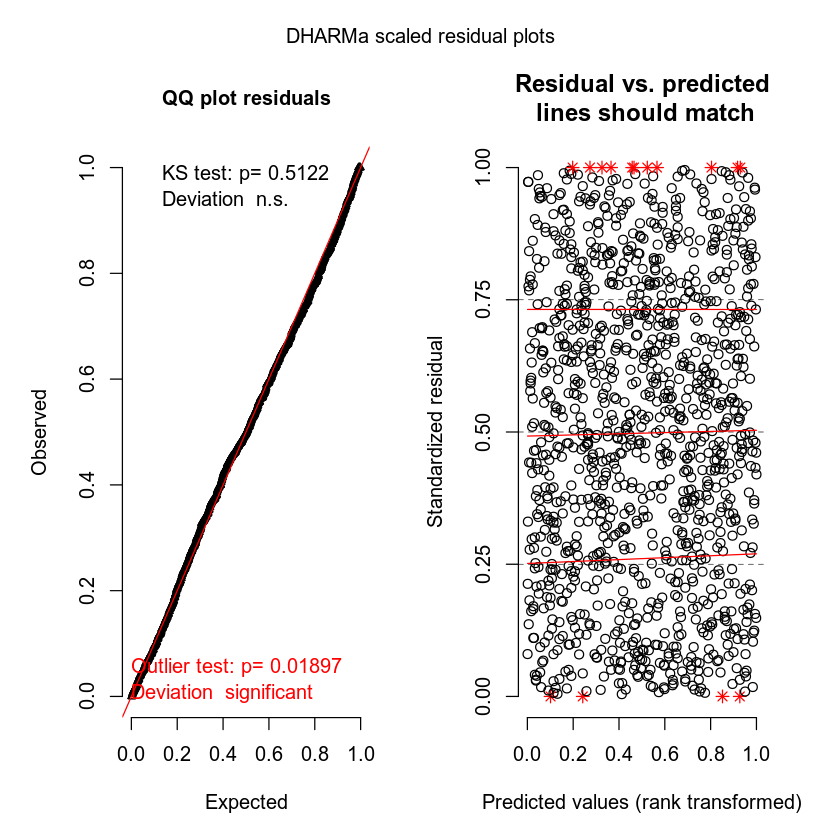

In [15]:
plot(simulateResiduals(nb_zinfl_model1))

In [16]:
summary(nb_zinfl_model1)

 Family: nbinom2  ( log )
Formula:          Intensity ~ factor(Area) * factor(Year) + Length
Zero inflation:             ~factor(Area) * factor(Year) + Length
Data: data_df

     AIC      BIC   logLik deviance df.resid 
  4954.9   5092.1  -2450.4   4900.9     1164 


Overdispersion parameter for nbinom2 family (): 0.38 

Conditional model:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     3.733907   0.344396  10.842  < 2e-16 ***
factor(Area)2                   0.197764   0.329133   0.601  0.54793    
factor(Area)3                  -0.646742   0.277793  -2.328  0.01990 *  
factor(Area)4                   0.707494   0.252265   2.805  0.00504 ** 
factor(Year)2000                0.063887   0.295639   0.216  0.82891    
factor(Year)2001               -0.939202   0.606051  -1.550  0.12121    
Length                         -0.036410   0.005108  -7.128 1.02e-12 ***
factor(Area)2:factor(Year)2000 -0.653976   0.535418  -1.221  0.22192    
f

In [18]:
nb_zinfl_model2 = glmmTMB(Intensity ~ factor(Area) + factor(Year) + Length,
                          ziformula = ~ factor(Area) * factor(Year) + Length,
                          family = "nbinom2",
                          data = data_df)

It seems you are diagnosing a glmmTBM model. There are still a few minor limitations associatd with this package. The most important is that glmmTMB doesn't implement an option to create unconditional predictions from the model, which means that predicted values (in res ~ pred) plots include the random effects. With strong random effects, this can sometimes create diagonal patterns from bottom left to top right in the res ~ pred plot. All other tests and plots should work as desired. Please see https://github.com/florianhartig/DHARMa/issues/16 for further details.


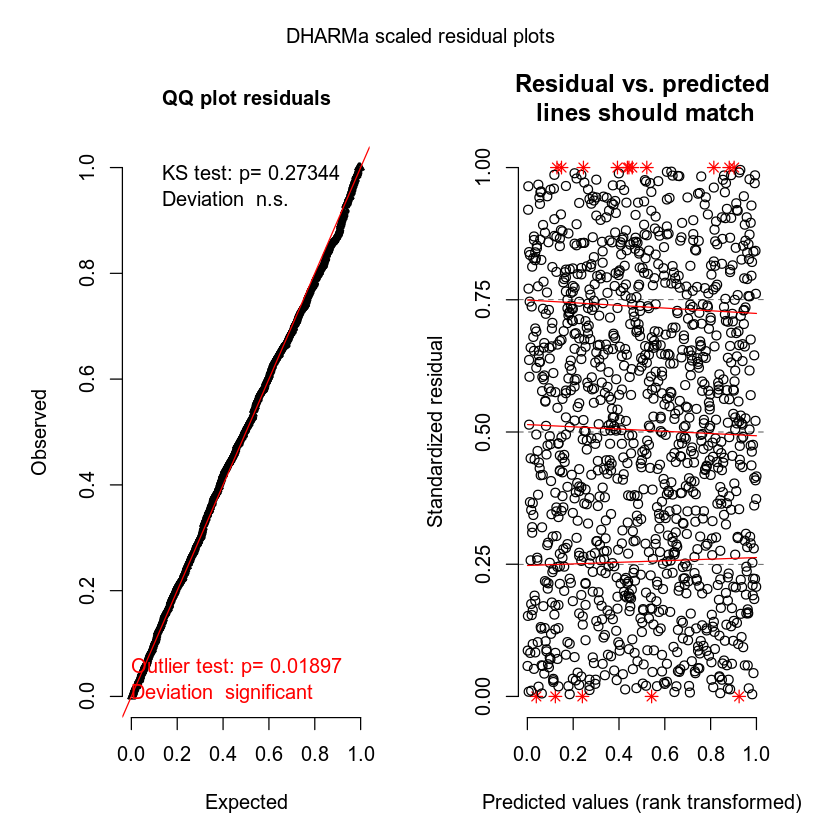

In [19]:
plot(simulateResiduals(nb_zinfl_model2))

In [20]:
summary(nb_zinfl_model2)

 Family: nbinom2  ( log )
Formula:          Intensity ~ factor(Area) + factor(Year) + Length
Zero inflation:             ~factor(Area) * factor(Year) + Length
Data: data_df

     AIC      BIC   logLik deviance df.resid 
  4957.1   5063.9  -2457.6   4915.1     1170 


Overdispersion parameter for nbinom2 family (): 0.373 

Conditional model:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       3.506673   0.326802  10.730  < 2e-16 ***
factor(Area)2     0.253818   0.229993   1.104  0.26977    
factor(Area)3    -0.201679   0.205508  -0.981  0.32641    
factor(Area)4     0.910463   0.195024   4.668 3.03e-06 ***
factor(Year)2000  0.462925   0.173091   2.674  0.00749 ** 
factor(Year)2001 -0.127889   0.166796  -0.767  0.44324    
Length           -0.034978   0.004963  -7.048 1.81e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Zero-inflation model:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)          

# 4. Fitting a two-part zero adjusted model

In [21]:
nb_zadj_model1 = glmmTMB(Intensity ~ factor(Area) * factor(Year) + Length,
                         ziformula = ~ factor(Area) * factor(Year),
                         family = "truncated_nbinom2",
                         data = data_df)

It seems you are diagnosing a glmmTBM model. There are still a few minor limitations associatd with this package. The most important is that glmmTMB doesn't implement an option to create unconditional predictions from the model, which means that predicted values (in res ~ pred) plots include the random effects. With strong random effects, this can sometimes create diagonal patterns from bottom left to top right in the res ~ pred plot. All other tests and plots should work as desired. Please see https://github.com/florianhartig/DHARMa/issues/16 for further details.


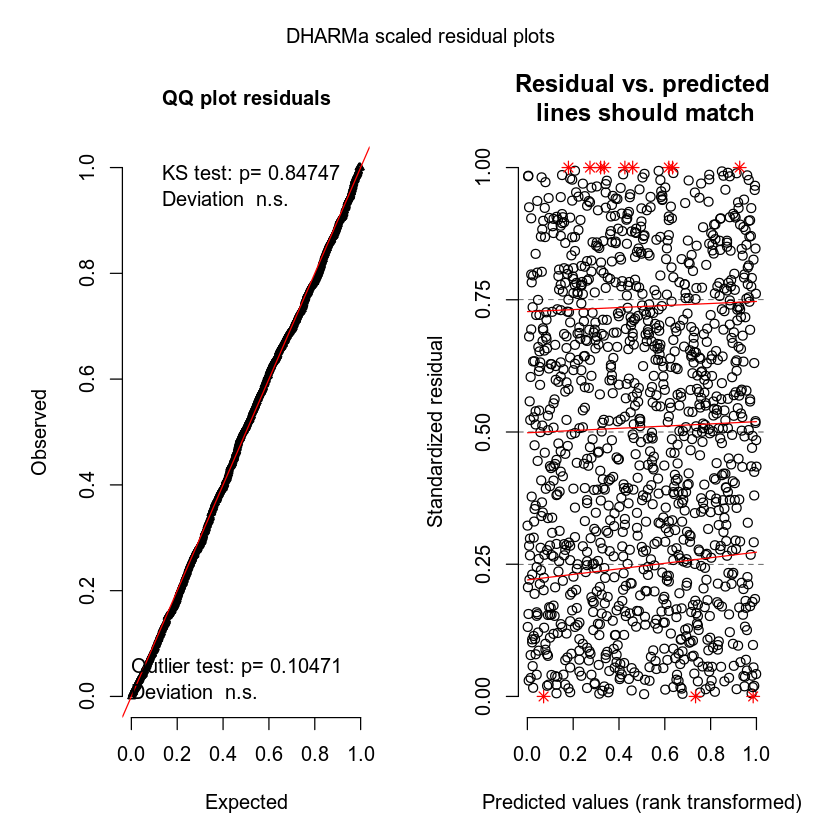

In [22]:
plot(simulateResiduals(nb_zadj_model1))

In [23]:
summary(nb_zadj_model1)

 Family: truncated_nbinom2  ( log )
Formula:          Intensity ~ factor(Area) * factor(Year) + Length
Zero inflation:             ~factor(Area) * factor(Year)
Data: data_df

     AIC      BIC   logLik deviance df.resid 
  4937.3   5069.5  -2442.7   4885.3     1165 


Overdispersion parameter for truncated_nbinom2 family (): 0.223 

Conditional model:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     3.375809   0.399469   8.451  < 2e-16 ***
factor(Area)2                   0.378985   0.381046   0.995  0.31994    
factor(Area)3                  -0.504797   0.312376  -1.616  0.10610    
factor(Area)4                   0.891581   0.291610   3.057  0.00223 ** 
factor(Year)2000               -0.039567   0.328566  -0.120  0.90415    
factor(Year)2001               -0.753907   0.689245  -1.094  0.27404    
Length                         -0.037479   0.005873  -6.382 1.75e-10 ***
factor(Area)2:factor(Year)2000 -0.639828   0.616670  -1.038  0

# R environment

In [1]:
library(tidyverse)
library(glmmTMB)
library(DHARMa)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'DHARMa':
  method        from   
  refit.glmmTMB glmmTMB


In [2]:
setwd("~/mixed-effects-models")

In [3]:
print(sessionInfo())

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] DHARMa_0.2.4    glmmTMB_0.2.3   forcats_0.4.0   stringr_1.4.0  
 [5] dplyr_0.8.0.1   purrr_0.3.2     readr_1.3.1     tidyr_0.8.3    
 [9] tibble_2.1.1    ggplot2_3.1.1   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1          lubridate_1.7.4     lattice_0.20-38    
 [4] assertthat_0.2.1    dig